In [1]:
!pip install scikit-learn

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os
import glob


2024-10-11 10:17:27.806250: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-10-11 10:17:27.806265: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

# Initial parameters
epochs = 100
lr = 1e-3
batch_size = 64
img_dims = (96, 96, 3)

# Define data generators
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load training and test datasets
training_set = train_datagen.flow_from_directory(
    'training_set',  # Change this to your local path
    target_size=(img_dims[0], img_dims[1]),
    batch_size=batch_size,
    class_mode='binary'
)

test_set = test_datagen.flow_from_directory(
    'test_set',  # Change this to your local path
    target_size=(img_dims[0], img_dims[1]),
    batch_size=batch_size,
    class_mode='binary'
)



Found 4009 images belonging to 2 classes.
Found 978 images belonging to 2 classes.


libpng warning: iCCP: known incorrect sRGB profile


Failed to load image: training_set/men/533.jpg


libpng warning: iCCP: known incorrect sRGB profile


Failed to load image: training_set/men/104.jpg


libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


Failed to load image: training_set/women/245.jpg


Corrupt JPEG data: 6 extraneous bytes before marker 0xed
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
Corrupt JPEG data: 6 extraneous bytes before marker 0xed
libpng warning: iCCP: known incorrect sRGB profile
Corrupt JPEG data: 6 extraneous bytes before marker 0xed


Epoch 1/100
50/50 [==============================] - 59s 948ms/step - loss: 0.9562 - accuracy: 0.6044 - val_loss: 0.7026 - val_accuracy: 0.5056
Epoch 2/100
50/50 [==============================] - 18s 344ms/step - loss: 0.7802 - accuracy: 0.6359 - val_loss: 0.7241 - val_accuracy: 0.4844
Epoch 3/100
50/50 [==============================] - 14s 273ms/step - loss: 0.7124 - accuracy: 0.6653 - val_loss: 0.6975 - val_accuracy: 0.5081
Epoch 4/100
50/50 [==============================] - 16s 310ms/step - loss: 0.6464 - accuracy: 0.6894 - val_loss: 1.1898 - val_accuracy: 0.4844
Epoch 5/100
50/50 [==============================] - 17s 336ms/step - loss: 0.6108 - accuracy: 0.7166 - val_loss: 0.7155 - val_accuracy: 0.5855
Epoch 6/100
50/50 [==============================] - 13s 255ms/step - loss: 0.5979 - accuracy: 0.7053 - val_loss: 0.9977 - val_accuracy: 0.5268
Epoch 7/100
50/50 [==============================] - 13s 261ms/step - loss: 0.5728 - accuracy: 0.7306 - val_loss: 0.9237 - val_accuracy:

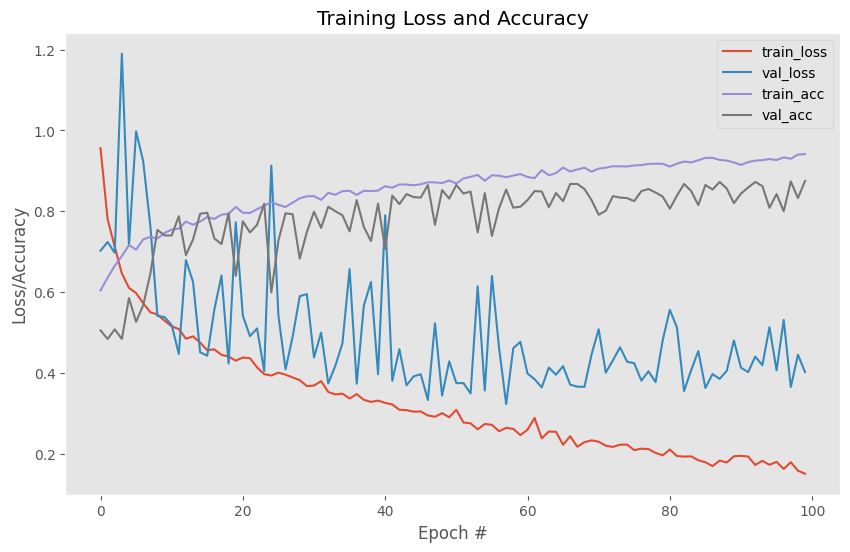

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

# Initial parameters
epochs = 100
lr = 1e-3
batch_size = 64
img_dims = (64, 64, 3)

data = []
labels = []

# Supported image formats
supported_formats = ('.jpg', '.jpeg', '.png')

# Load training images
train_path = 'training_set'
for category in ['men', 'women']:
    category_path = os.path.join(train_path, category)
    for img_file in os.listdir(category_path):
        if not img_file.lower().endswith(supported_formats):
            continue  # Skip unsupported file formats

        img_path = os.path.join(category_path, img_file)
        image = cv2.imread(img_path)

        if image is None:  # Check if the image was loaded successfully
            print(f"Failed to load image: {img_path}")
            continue

        image = cv2.resize(image, (img_dims[0], img_dims[1]))
        image = img_to_array(image)
        data.append(image)

        label = 1 if category == "women" else 0
        labels.append(label)

# Convert to NumPy arrays and preprocess
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

# Split dataset for training and validation
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=42)

# One-hot encoding
trainY = to_categorical(trainY, num_classes=2)
testY = to_categorical(testY, num_classes=2)

# Augmenting dataset
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
                         height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
                         horizontal_flip=True, fill_mode="nearest")

# Define model
def build(width, height, depth, classes):
    model = Sequential()
    inputShape = (height, width, depth)
    chanDim = -1

    if K.image_data_format() == "channels_first":
        inputShape = (depth, height, width)
        chanDim = 1

    model.add(Conv2D(32, (3, 3), padding="same", input_shape=inputShape))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(64, (3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(128, (3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(classes))
    model.add(Activation("sigmoid"))

    return model

# Build model
model = build(width=img_dims[0], height=img_dims[1], depth=img_dims[2], classes=2)

# Compile the model
opt = Adam(learning_rate=lr)  # Update here to use 'learning_rate'
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

# Train the model
H = model.fit(aug.flow(trainX, trainY, batch_size=batch_size),
              validation_data=(testX, testY),
              steps_per_epoch=len(trainX) // batch_size,
              epochs=epochs, verbose=1)

# Save the model to Google Drive (if desired) without saving to local disk
#model.save('/content/drive/MyDrive/gender_detection.model') # Uncomment this line if needed

# Plot training/validation loss/accuracy
plt.style.use("ggplot")
plt.figure(figsize=(10, 6))
N = epochs
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")
plt.grid()

# Display the plot inline
plt.show()


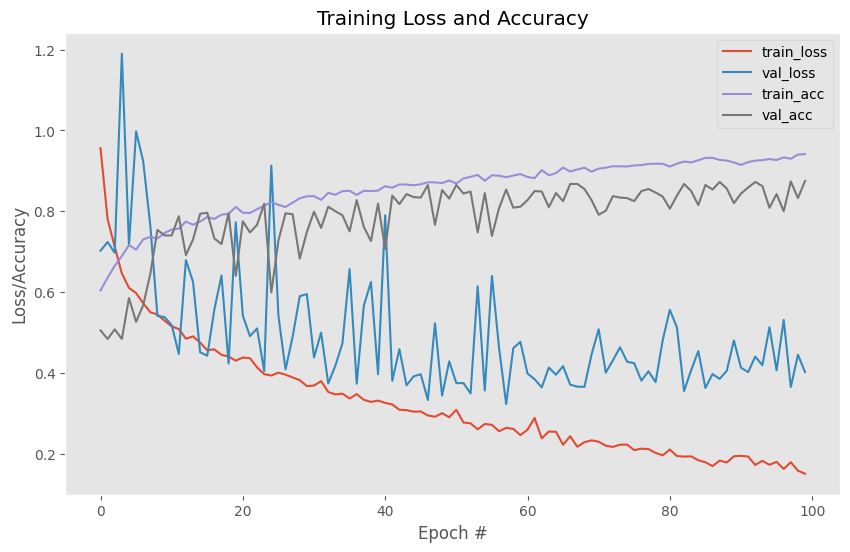

In [24]:
plt.style.use("ggplot")
plt.figure(figsize=(10, 6))
N = epochs
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")
plt.grid()

# Display the plot inline
plt.show()


In [25]:
final_train_acc = H.history["accuracy"][-1]
final_val_acc = H.history["val_accuracy"][-1]
print(f"Final Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")

Final Training Accuracy: 0.9416
Final Validation Accuracy: 0.8752


In [26]:
!pip install cvlib



1/1 [==============================] - 0s 11ms/step


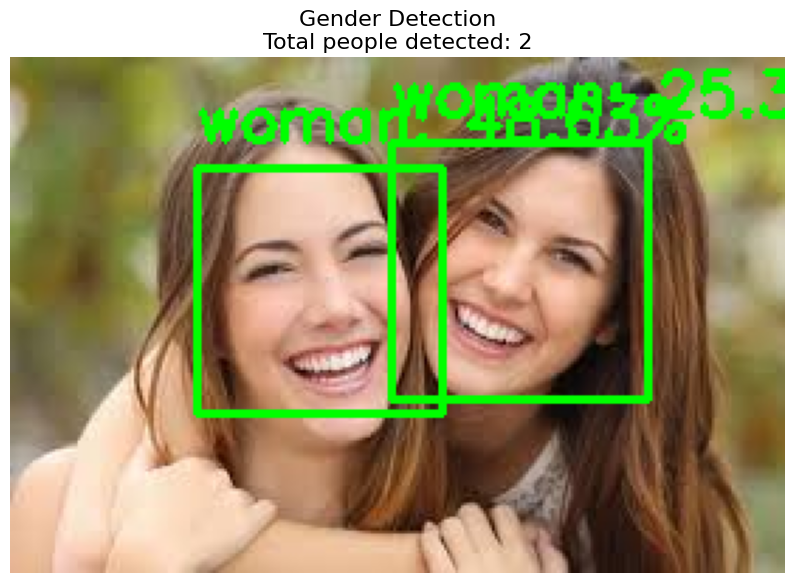

In [5]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the gender detection model
model = load_model('best_model.keras')

# Specify the path to the image
image_path = 'Pop12.jpeg'  # Change this to your image path

# Load the image
frame = cv2.imread(image_path)

# Load Haar cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Convert to grayscale for face detection
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

# List to hold predictions
predictions = []
total_people = len(faces)  # Count of detected faces

# Loop through detected faces
for (startX, startY, width, height) in faces:
    endX = startX + width
    endY = startY + height

    # Draw rectangle over face
    cv2.rectangle(frame, (startX, startY), (endX, endY), (0, 255, 0), 2)

    # Crop the detected face region
    face_crop = np.copy(frame[startY:endY, startX:endX])

    if (face_crop.shape[0]) < 10 or (face_crop.shape[1]) < 10:
        continue

    # Preprocessing for gender detection model
    face_crop = cv2.resize(face_crop, (64, 64))  # Resize to (64, 64)
    face_crop = face_crop.astype("float") / 255.0
    face_crop = img_to_array(face_crop)
    face_crop = np.expand_dims(face_crop, axis=0)

    # Apply gender detection on face
    conf = model.predict(face_crop)[0]  # Model.predict returns a 2D matrix

    # Get label with max accuracy
    idx = np.argmax(conf)
    label = ['woman', 'man'][idx]

    label = "{}: {:.2f}%".format(label, conf[idx] * 100)
    predictions.append(label)

    Y = startY - 10 if startY - 10 > 10 else startY + 10

    # Write label and confidence above face rectangle
    cv2.putText(frame, label, (startX, Y), cv2.FONT_HERSHEY_SIMPLEX,
                0.7, (0, 255, 0), 2)

# Convert BGR image to RGB
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Create a total count label for the image
total_count_label = "Total people detected: {}".format(total_people)

# Display output using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(frame_rgb)
plt.axis('off')  # Hide axis
plt.title("Gender Detection\n" + total_count_label, fontsize=16)  # Add total count to title
plt.show()


1/1 [==============================] - 0s 80ms/step
Raw confidence scores: [0.13369638]
1/1 [==============================] - 0s 15ms/step
Raw confidence scores: [0.14763671]
1/1 [==============================] - 0s 23ms/step
Raw confidence scores: [0.07047164]


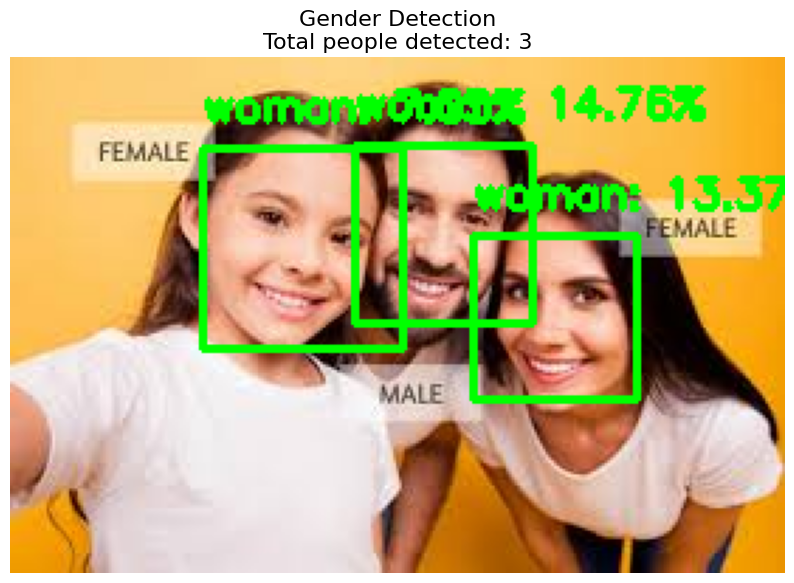

In [20]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the gender detection model
model = load_model('best_model.keras')

# Specify the path to the image
image_path = 'Pop10.jpeg'  # Change this to your image path

# Load the image
frame = cv2.imread(image_path)

# Load Haar cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Convert to grayscale for face detection
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

# List to hold predictions
predictions = []
total_people = len(faces)  # Count of detected faces

# Loop through detected faces
for (startX, startY, width, height) in faces:
    endX = startX + width
    endY = startY + height

    # Draw rectangle over face
    cv2.rectangle(frame, (startX, startY), (endX, endY), (0, 255, 0), 2)

    # Crop the detected face region
    face_crop = np.copy(frame[startY:endY, startX:endX])

    if (face_crop.shape[0]) < 10 or (face_crop.shape[1]) < 10:
        continue

    # Preprocessing for gender detection model
    face_crop = cv2.resize(face_crop, (64, 64))  # Resize to (64, 64)
    face_crop = face_crop.astype("float") / 255.0
    face_crop = img_to_array(face_crop)
    face_crop = np.expand_dims(face_crop, axis=0)

    # Apply gender detection on face
    conf = model.predict(face_crop)[0]  # Model.predict returns a 2D matrix

    # Debugging: Print raw confidence scores
    print("Raw confidence scores:", conf)

    # Get label with max accuracy
    idx = np.argmax(conf)
    label = ['woman', 'man'][idx]

    label = "{}: {:.2f}%".format(label, conf[idx] * 100)
    predictions.append(label)

    Y = startY - 10 if startY - 10 > 10 else startY + 10

    # Write label and confidence above face rectangle
    cv2.putText(frame, label, (startX, Y), cv2.FONT_HERSHEY_SIMPLEX,
                0.5, (0, 255, 0), 2)

# Convert BGR image to RGB
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# Create a total count label for the image
total_count_label = "Total people detected: {}".format(total_people)

# Display output using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(frame_rgb)
plt.axis('off')  # Hide axis
plt.title("Gender Detection\n" + total_count_label, fontsize=16)  # Add total count to title
plt.show()
